In [1]:
#ket noi colab voi google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#ket noi voi cac thu vien can thiet
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm 

[[254 253 252 ... 255 254 252]
 [253 252 251 ... 255 253 251]
 [251 250 249 ... 254 252 249]
 ...
 [249 249 253 ... 251 248 249]
 [248 210 194 ... 215 208 233]
 [253 246 246 ... 249 246 254]]


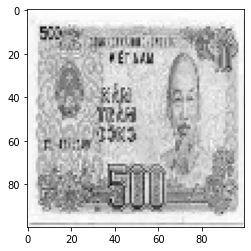

In [4]:
#tap training_data gom co 10 mon an
#chuyen doi cac anh sang mau xam va resize cac anh thanh kich thuoc 100X100
datadir = "/content/drive/MyDrive/MoneyVN/money"
categories=['500','1000','2000','5000','10000','20000','50000','100000','200000','500000']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [5]:
#tao ra training data
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 11/11 [00:02<00:00,  5.05it/s]

110


In [6]:
#luu cac tinh chat cua tap training_data vao x, y (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('x',x.shape)
print('y',y.shape)

x (110, 100, 100, 1)
y (110,)


In [7]:
#luu cac bien x, y la file.pickle vao google drive
pickle_out=open("/content/drive/MyDrive/MoneyVN/save/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/MoneyVN/save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [8]:
#Bat dau xay dung mo hinh
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [9]:
#lay cac bien x, y minh da luu trong file ra de co the xay dung mo hinh
pickle_in = open("/content/drive/MyDrive/MoneyVN/save/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/MoneyVN/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (110, 100, 100, 1)
y (110,)


In [10]:
#dung ham to_categorical de tao ra cac cot cho moi danh muc
y= to_categorical(y,10)

In [11]:
#su dung mang CNN co 3 convolution layers, filter size 3x3, Pooling size 2x2, ham kich hoat relu: Fully-Connected, 
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

In [12]:
#bat dau huan luyen mo hinh
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=30,batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/30
2/2 [==============================] - 14s 941ms/step - loss: 3.2782 - accuracy: 0.0909 - val_loss: 10.9367 - val_accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 0s 48ms/step - loss: 3.2775 - accuracy: 0.1136 - val_loss: 3.7063 - val_accuracy: 0.0000e+00
Epoch 3/30
2/2 [==============================] - 0s 45ms/step - loss: 2.1934 - accuracy: 0.1818 - val_loss: 5.2344 - val_accuracy: 0.0000e+00
Epoch 4/30
2/2 [==============================] - 0s 47ms/step - loss: 2.0937 - accuracy: 0.1250 - val_loss: 5.8918 - val_accuracy: 0.0000e+00
Epoch 5/30
2/2 [==============================] - 0s 48ms/step - loss: 2.0383 - accuracy: 0.2045 - val_loss: 6.0800 - val_accuracy: 0.0000e+00
Epoch 6/30
2/2 [==============================] - 0s 48ms/step - loss: 2.0050 - accuracy: 0.2386 - val_loss: 6.0494 - val_accuracy: 0.0000e+00
Epoch 7/30
2/2 [==============================] - 0s 49ms/step - loss: 1.9258 - accuracy: 0.4773 - val_loss: 7.1489 - val_accuracy: 0.0000e

In [13]:
model.save('MoneyVN.h5')

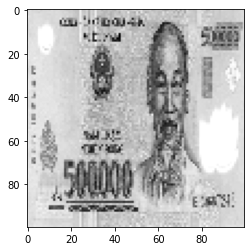

In [16]:
img_test='/content/500.000 - mat truoc.jpg'
categories=['500','1000','2000','5000','10000','20000','50000','100000','200000','500000']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()

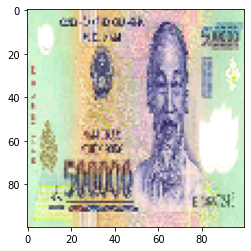

Prediction value 20000


In [17]:
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value',categories[int(np.argmax(prediction))])

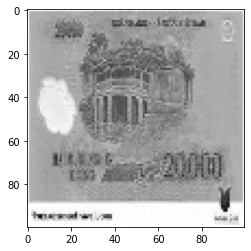

In [18]:
img_test='/content/th (6).jpg'
categories=['500','1000','2000','5000','10000','20000','50000','100000','200000','500000']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()

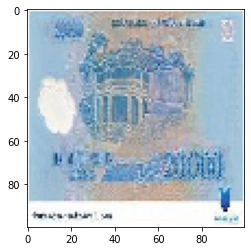

Prediction value 20000


In [19]:
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value',categories[int(np.argmax(prediction))])

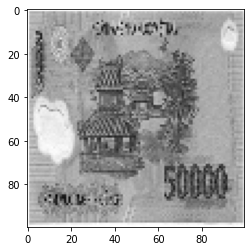

In [20]:
img_test='/content/100838baoxaydung_image007.jpg'
categories=['500','1000','2000','5000','10000','20000','50000','100000','200000','500000']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()

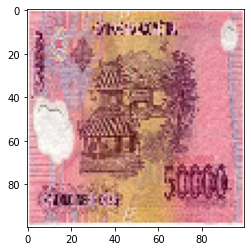

Prediction value 50000


In [21]:
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value',categories[int(np.argmax(prediction))])